In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Supervised Learning: Classification

## Reading and investigating the data

In [2]:
data = pd.read_csv('bankdata.csv')

In [3]:
data.shape

(74364, 9)

In [4]:
data.dtypes

type             object
operation        object
amount_total    float64
balance         float64
k_symbol         object
amount_left       int64
duration          int64
payments        float64
status           object
dtype: object

In [5]:
data.head()

,type,operation,amount_total,balance,k_symbol,amount_left,duration,payments,status
0,PRIJEM,prevod,44749.0,45549.0,unknown,79608,24,3317.0,A
1,PRIJEM,vklad,1000.0,1000.0,unknown,52788,12,4399.0,A
2,PRIJEM,vklad,1100.0,1100.0,unknown,21924,36,609.0,A
3,PRIJEM,vklad,700.0,700.0,unknown,23052,12,1921.0,A
4,PRIJEM,vklad,900.0,900.0,unknown,41904,12,3492.0,A


In [6]:
data['status'].value_counts()

A    64599
B     9765
Name: status, dtype: int64

### Investigating the numerical variables

In [7]:
data.describe()

,amount_total,balance,amount_left,duration,payments
count,74364.000000,74364.000000,74364.000000,74364.000000,74364.000000
mean,7832.649125,46022.153061,102745.132645,23.942230,4356.580832
std,11729.040391,25439.948570,74749.275498,12.155783,2205.840892
min,0.000000,-14137.200000,4980.000000,12.000000,319.000000
25%,144.300000,27675.125000,46320.000000,12.000000,2569.000000
50%,3000.000000,40965.150000,86184.000000,24.000000,4051.000000
75%,9868.500000,60098.550000,140400.000000,36.000000,6315.000000
max,87300.000000,193910.000000,464520.000000,60.000000,9736.000000


#### Investigating variable duration

In [8]:
data['duration'].value_counts()

12    28761
24    25155
36    14110
48     4721
60     1617
Name: duration, dtype: int64

In [9]:
# we will convert this to a categorical
data['duration'] = data['duration'].apply(str)

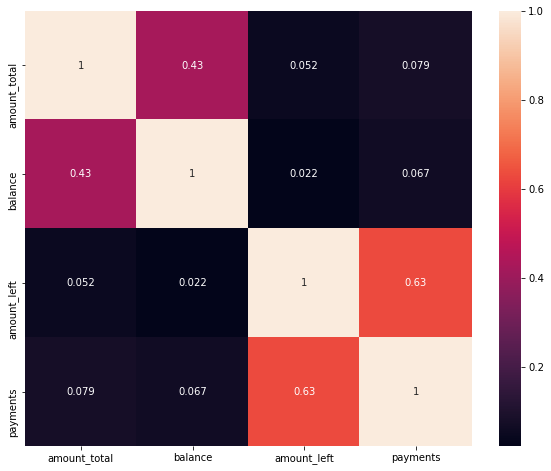

In [10]:
# Checking for multicollinearity
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

payments and amount_left have a rather high correlation, so we will include only one of them in the model

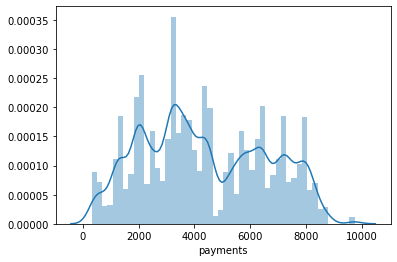

In [11]:
#sns.distplot(data['amount_total'])
#plt.show()

#sns.distplot(data['balance'])
#plt.show()

sns.distplot(data['payments'])
plt.show()

### Preprocessing the numerical variables

In [12]:
from sklearn.preprocessing import StandardScaler
data_num = data.select_dtypes(include = np.number).drop(columns = 'amount_left')
print(data_num.head())
# Standardizing data
transformer = StandardScaler().fit(data_num)
data_num_standardized = transformer.transform(data_num)
x = pd.DataFrame(data_num_standardized, columns = data_num.columns)
print(x.head())

   amount_total  balance  payments
0       44749.0  45549.0    3317.0
1        1000.0   1000.0    4399.0
2        1100.0   1100.0     609.0
3         700.0    700.0    1921.0
4         900.0    900.0    3492.0
   amount_total   balance  payments
0      3.147453 -0.018599 -0.471289
1     -0.582545 -1.769754  0.019231
2     -0.574019 -1.765823 -1.698947
3     -0.608123 -1.781547 -1.104158
4     -0.591071 -1.773685 -0.391953


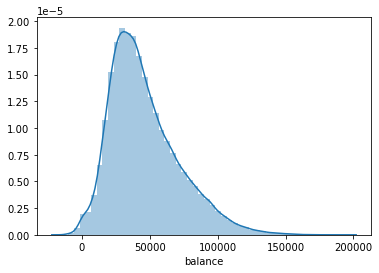

In [13]:
sns.distplot(data['balance'])
plt.show()

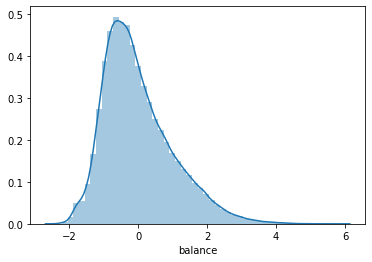

In [14]:
sns.distplot(x['balance'])
plt.show()

### Getting dummies for the categorical variables

In [15]:
from sklearn.preprocessing import OneHotEncoder
cat = data.select_dtypes(include = np.object).drop(columns = 'status')
enc = OneHotEncoder(drop = 'first')
categorical = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names())
categorical.head()

,x0_VYBER,x0_VYDAJ,x1_unknown,x1_vklad,x1_vyber,x2_sankc. urok,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_24,x3_36,x3_48,x3_60
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
categorical.sum(axis = 1)

0        2.0
1        2.0
2        3.0
3        2.0
4        2.0
        ... 
74359    3.0
74360    3.0
74361    3.0
74362    3.0
74363    3.0
Length: 74364, dtype: float64

In [17]:
y = data['status']
X = pd.concat((x, categorical), axis=1)
X.head()

,amount_total,balance,payments,x0_VYBER,x0_VYDAJ,x1_unknown,x1_vklad,x1_vyber,x2_sankc. urok,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_24,x3_36,x3_48,x3_60
0,3.147453,-0.018599,-0.471289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.582545,-1.769754,0.019231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.574019,-1.765823,-1.698947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.608123,-1.781547,-1.104158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.591071,-1.773685,-0.391953,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting into train and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression(max_iter = 500).fit(X_train, y_train)

In [20]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

0.8806898406508438

In [21]:
y_test.value_counts()

A    25839
B     3907
Name: status, dtype: int64

In [22]:
pd.Series(predictions).value_counts()

A    29120
B      626
dtype: int64

What happened in terms of the classes?

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [24]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.9951926309419754

In [25]:
pd.Series(predictions).value_counts()

A    25816
B     3930
dtype: int64

In [26]:
decisiontree.feature_importances_

array([1.42066724e-02, 1.22273232e-01, 6.88159682e-01, 5.94555031e-04,
       1.98516740e-03, 6.87391456e-04, 1.64912352e-03, 1.33564636e-03,
       0.00000000e+00, 4.49245374e-04, 2.73486563e-06, 3.49869781e-04,
       1.66695987e-04, 1.36044870e-04, 8.13853504e-02, 4.15453574e-02,
       8.47162746e-03, 3.66016041e-02])

In [27]:
print(dict(zip(X.columns, decisiontree.feature_importances_)))

{'amount_total': 0.01420667241536795, 'balance': 0.12227323195848683, 'payments': 0.6881596815665205, 'x0_VYBER': 0.0005945550310770408, 'x0_VYDAJ': 0.001985167403102433, 'x1_unknown': 0.0006873914563062145, 'x1_vklad': 0.0016491235174268231, 'x1_vyber': 0.0013356463559430008, 'x2_sankc. urok': 0.0, 'x2_sipo': 0.00044924537401707504, 'x2_sluzby': 2.7348656265233676e-06, 'x2_unknown': 0.0003498697806173521, 'x2_urok': 0.00016669598741948297, 'x2_uver': 0.00013604487013131372, 'x3_24': 0.08138535039104715, 'x3_36': 0.04154535744957225, 'x3_48': 0.008471627461195242, 'x3_60': 0.036601604116142786}


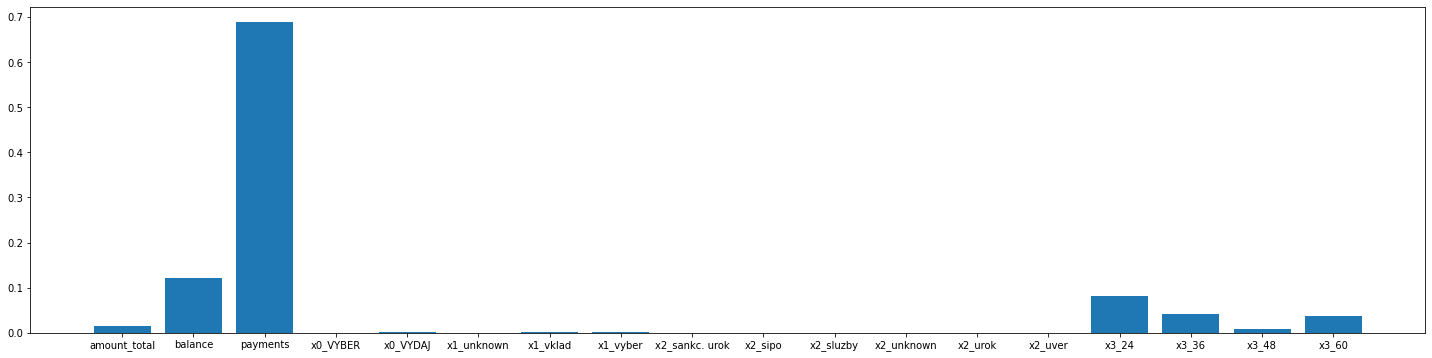

In [28]:
plt.rcParams['figure.figsize'] = [25, 6]
plt.bar(height = decisiontree.feature_importances_, x = X.columns)
plt.show()

### SVM

In [29]:
from sklearn.svm import SVC

#svm = SVC().fit(X_train, y_train)
#predictions = svm.predict(X_test)
#print(svm.score(X_test, y_test))
#print(pd.Series(predictions).value_counts())

### K-Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#nearest_neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
#predictions = nearest_neighbors.predict(X_test)
#print(nearest_neighbors.score(X_test, y_test))
#print(pd.Series(predictions).value_counts())

In [ ]:
#help(KNeighborsClassifier)

## Supervised Learning: Regression

In [31]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# SVR
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor

## Model Evaluation

### Creating the Confusion Matrix

In [32]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression().fit(X_train, y_train)

In [33]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

0.8806898406508438

In [34]:
pd.Series(predictions).value_counts()

A    29120
B      626
dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[25705   134]
 [ 3415   492]]


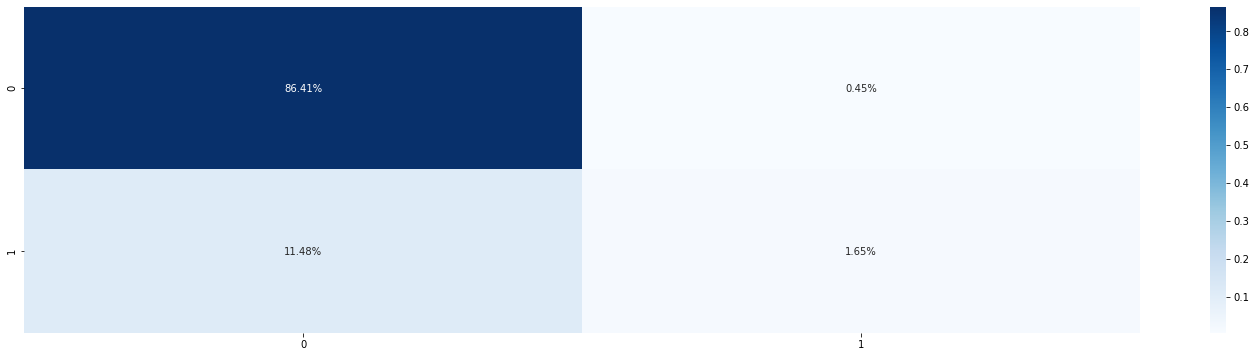

In [36]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### Precision, Recall and the F1 Score

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score
# We need to assign which is the 'positive class'. Here, we are trying to predict whether a customer will run into
# problems repaying their loan. So Status B is the 'positive' class (meaning credit problems = True)
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

0.7859424920127795
0.12592782185820323
0.2170747849106552


In [38]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

0.5603709313246278

In [39]:
# balanced accuracy score: average of recall for the two classes
print(recall_score(y_test, predictions, pos_label='A'))
print(recall_score(y_test, predictions, pos_label='B'))

0.9948140407910523
0.12592782185820323


In [40]:
#help(balanced_accuracy_score)

#### ROC and AUC analysis

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
#help(roc_curve)

In [1]:
# we need to calculate class probabilities!

y_pred_proba = logisticr.predict_proba(X_test)[:,1]
y_pred_proba
fpr, tpr, kittycat = roc_curve(y_test, y_pred_proba, pos_label='B') 
plt.plot(fpr,tpr)

NameError: name 'logisticr' is not defined

In [43]:
logisticr.predict(X_test)

array(['A', 'A', 'A', ..., 'A', 'A', 'A'], dtype=object)

In [44]:
logisticr.predict_proba(X_test)#[:,1]

array([[0.98769117, 0.01230883],
       [0.85790584, 0.14209416],
       [0.75955909, 0.24044091],
       ...,
       [0.93178667, 0.06821333],
       [0.83162412, 0.16837588],
       [0.79740812, 0.20259188]])

In [45]:
#help(logisticr.predict_proba)

In [46]:
#help(roc_auc_score)

In [47]:
roc_auc_score(y_test, y_pred_proba)

0.7585273887872525

### Repeating all the steps for a Decision Tree for comparison:

In [48]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [49]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.9951926309419754

In [50]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[25757    82]
 [   61  3846]]


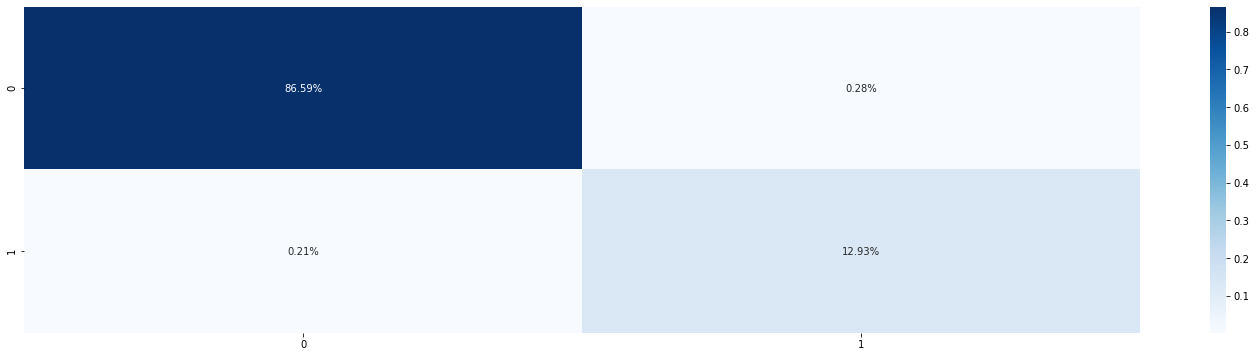

In [51]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [52]:
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

0.9791242362525459
0.9843869976964423
0.9817485641352904


In [53]:
balanced_accuracy_score(y_test, predictions)

0.9906067501350357

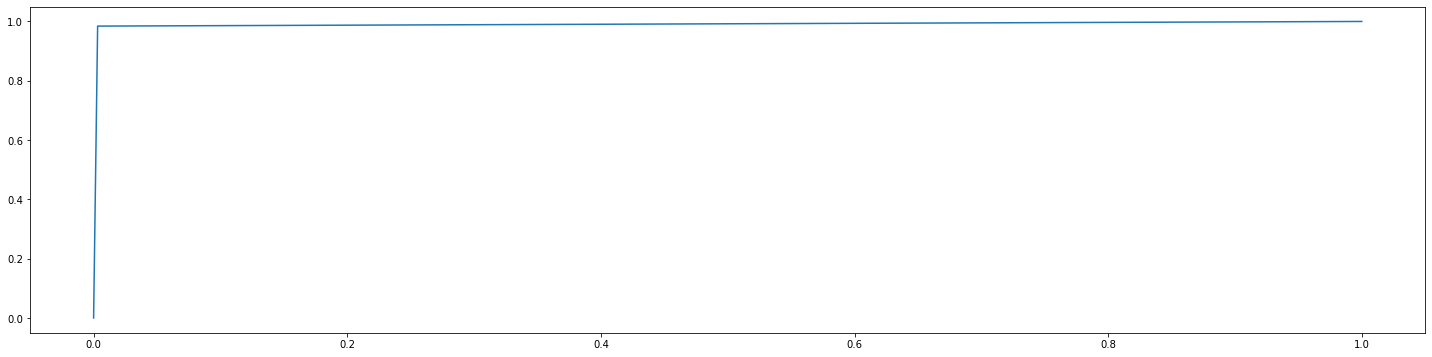

In [54]:
y_pred_proba = decisiontree.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='B') 
# we need to assign which one is the "positive" (1) category
plt.plot(fpr,tpr)

In [55]:
roc_auc_score(y_test, y_pred_proba)

0.9906067501350357

### Hyperparameter Tuning

Can we do even better?

In [ ]:
# the  material is for claffification regressions:

In [57]:
from sklearn.model_selection import GridSearchCV
#help(GridSearchCV)
# we give the estimator (such as decisionree) to gridsearch , 

In [60]:
#help(DecisionTreeClassifier)
# define maxpeth to be limited, 

In [63]:
# we define a set of criteria for our GridSearch. Here because we are using
# decision tree, we use the below parameters with different combination:
param_grid = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [3, 10, None]}

tune = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid,
                       cv=3) # cv is crossValidation

tune.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, None],
                         'splitter': ['best', 'random']})

In [64]:
# here it gives us the best model for 
tune.best_params_

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}

In [72]:
# here is our optimised decion tree:
decisiontree_opt = DecisionTreeClassifier(**tune.best_params_).fit(X_train, y_train)


In [73]:
# or we can use this one:
decisiontree_opt = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, splitter= 'best').fit(X_train, y_train)

In [66]:
predictions = decisiontree_opt.predict(X_test)
decisiontree_opt.score(X_test, y_test)

0.9960666980434344

In [67]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[25775    64]
 [   53  3854]]


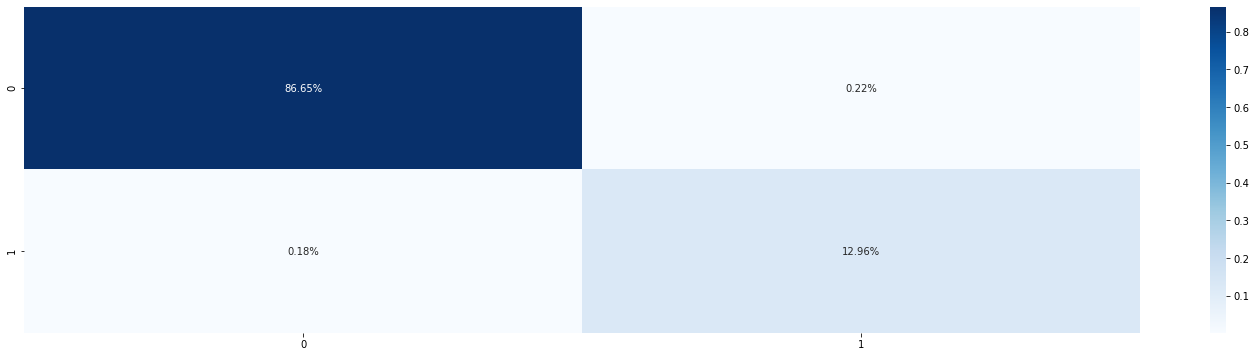

In [68]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [69]:
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

0.9836651352730985
0.9864346045559252
0.9850479233226838


In [70]:
balanced_accuracy_score(y_test, predictions)

0.9919788642579155

In [ ]:
# this model provides better results as compared to previous 
#Deciontree model as well as other models.

#### We can even extend this to multiple algorithms!

In [74]:
# the models that you want to compare
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression()
}

# the optimisation parameters for each of the models that you have picked 
# above (check their help functions!!)
params = {'DecisionTreeClassifier':
        {'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'max_depth': [3, 10, None]
        },
    'LogisticRegression': {
        'solver': ['newton-cg', 'sag', 'lbfgs'],
        'multi_class': ['ovr', 'multinomial']
        }}

In [75]:
for model in models.keys():
    tune = GridSearchCV(estimator=models[model], param_grid=params[model], cv=3)
    tune.fit(X_train, y_train)
    print("Best estimator is {}".format(tune.best_estimator_))
    print("Best parameters are: {}".format(tune.best_params_))
    print("Best score is: {}".format(tune.best_score_))

Best estimator is DecisionTreeClassifier(criterion='entropy')
Best parameters are: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
Best score is: 0.9952261494459799
Best estimator is LogisticRegression(multi_class='ovr')
Best parameters are: {'multi_class': 'ovr', 'solver': 'lbfgs'}
Best score is: 0.8798691044700852


In [77]:
print ('hello {}{}'.format(5, 3))

hello 53


In [ ]:
# we pick the decision tree as it has a better score , 
# score here is the model accuracy

### Cross Validation

Is our split into training and test set biased?

In [79]:
# what will happen if we split differently ? 
from sklearn.model_selection import cross_validate
#help(cross_validate)

In [82]:
# the default of split is 5, it means 80%,20% test &
# train to check if our model is truly good:
#
cross_validate(DecisionTreeClassifier(),
               X_train,
               y_train,
               scoring="balanced_accuracy")

{'fit_time': array([0.12649202, 0.11428189, 0.10622573, 0.11559606, 0.1164968 ]),
 'score_time': array([0.02713799, 0.02615714, 0.0261662 , 0.02616978, 0.02608013]),
 'test_score': array([0.98516226, 0.98746399, 0.99024209, 0.99000131, 0.98764838])}

In [83]:
# balance accuracy is better than other scores.
# we are interested in the test_score, so we take average of test_score
# to see the final score. 
# this is a sort of performance criteria validation. 

In [84]:
cross_validate(DecisionTreeClassifier(),
               X_train,
               y_train,
               scoring="balanced_accuracy")["test_score"].mean()

0.988675292214961

## Pretending this was a multiclass problem

In [87]:
# faking a class "c" just to make our data to be multi-class. so we create
# a new class
y_train[:5000] = 'C'
y_test[:5000] = 'C'

In [88]:
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.7469911920930545

In [89]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[18843    57  2622]
 [   49  2786   389]
 [ 3791   618   591]]


In [ ]:
#help(precision_score)

In [90]:
# there are several average functions such as macro, weighted, etc:
# this will give us a average of the three class for each score:
print(precision_score(y_test, predictions, average = 'macro'))
print(recall_score(y_test, predictions, average = 'macro'))
print(f1_score(y_test, predictions, average = 'macro'))

0.5999184663554585
0.6192888805107498
0.6078152508824076


In [91]:
# this will give the scores for each class:
print(precision_score(y_test, predictions, average = None))
print(recall_score(y_test, predictions, average = None))
print(f1_score(y_test, predictions, average = None))

[0.83071022 0.80496966 0.16407551]
[0.87552272 0.86414392 0.1182    ]
[0.85252799 0.83350785 0.1374099 ]


In [92]:
balanced_accuracy_score(y_test, predictions)

0.6192888805107498